# The Riddler Express Card

"The Riddler Express™ card is for the mathematically inclined, its parent company has issued a corporate mandate regarding symmetry. In particular, the areas of all three regions must be exactly the same. If that’s the case, how far apart must the centers of the two circles be?"

https://fivethirtyeight.com/features/can-you-win-the-tour-de-fivethirtyeight/

Let $\alpha$ be the angle between the line connecting the two centers and the line connecting the center of one of the circles and one of the intersection points.

We can compute the area, $A$, of the intersection as a function of $\alpha$, whose cosine gives us half of the distance between the centers.

$$A = 2(arccos(cos(\alpha)) - cos(\alpha)sin(\alpha))$$

And since the area of the unit circle is $\pi$, $A/\pi$ will give the ratio of the intersection and the unit circle.

In [1]:
from math import sin,cos,pi,sqrt,radians,acos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib
from matplotlib.animation import FuncAnimation
import numpy as np
import subprocess
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

def cos2area(cosa):
    # Given cosine a, it gives the area of the intersection in pi units.
    # a: the angle between the line connecting the centers and the
    #    line connecting one center to one of the points where two
    #    circles intersect.
    return round((acos(cosa) - cosa*abs(sqrt(1-cosa**2)))*2/pi, 2)

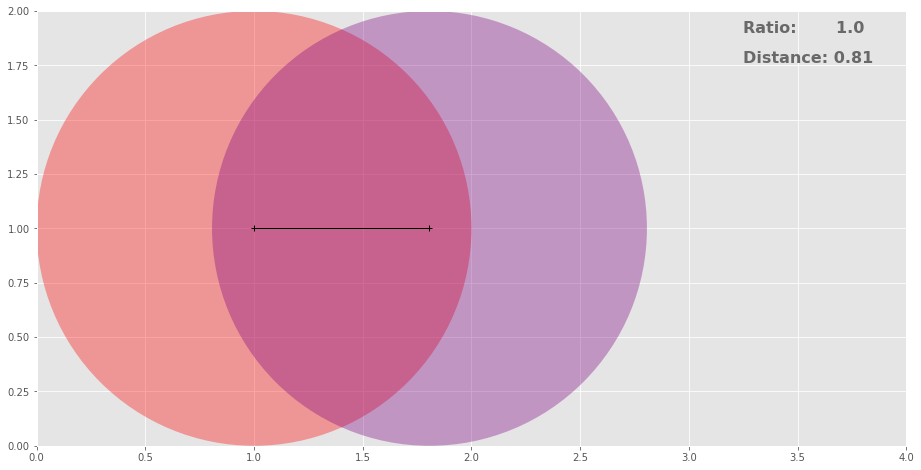

In [2]:
# Animation

# Initialize figure
patches =[]
fig, ax = plt.subplots(figsize = (16,8))

ax.set_xlim(0,4)
ax.set_ylim(0,2)
ax.set_aspect(1)

# Circles
left_center = (1,1)
right_center = (3,1)
patches.append(mpatches.Circle(xy=left_center,radius = 1)) #Left Circle
patches.append(mpatches.Circle(xy=right_center,radius = 1)) #Right Circle
p=PatchCollection(patches, alpha=0.35, fc = ['red','purple'])

# Center Markers
left_marker = ax.plot(left_center[0], left_center[1], marker='+', c='black')
right_marker = ax.plot(right_center[0], right_center[1], marker='+', c='black')[0]

# Placing Texts
dist = right_center[0]-left_center[0]
area = cos2area(dist/2)
ratio_text = ax.text(3.25,1.90,'Ratio:       '+str(round(area/(1-area),2)),
                     fontsize = 16, c='dimgrey', fontweight = 'bold')
dist_text = ax.text(3.25, 1.76, 'Distance: ' + str(round(dist,2)),
                    fontsize = 16, c='dimgrey', fontweight = 'bold')

# Line connecting the centers
cent = np.linspace(1,right_center[0],2)
center_line = ax.plot(cent,[1,1],c='black', linewidth=1)[0]

ax.add_collection(p)

def animate(i):
    patches = []
    left_center = (1,1)
    
    if i < 10:   # Delay the beginning of animation
        right_center = (3,1)
    elif i >=10 and i < 110:
        right_center = (3-.0119*(i-10),1)
    else:        # Pause at the solution
        right_center = (1.807,1) 
        
    # Update circle Locations
    patches.append(mpatches.Circle(xy=left_center,radius = 1))  #Left Circle
    patches.append(mpatches.Circle(xy=right_center,radius = 1)) #Right Circle
    p.set_paths(patches)
    
    # Move the right marker along
    right_marker.set_data(right_center[0], right_center[1])
    
    # Redraw the line between the centers
    cent = np.linspace(1,right_center[0],2)
    center_line.set_data(cent,[1,1])
    
    # Adjust the texts
    dist = right_center[0]-left_center[0]
    area = cos2area(dist/2)
    ratio_text.set_text('Ratio:       '+str(round(area/(1-area),2)))
    dist_text.set_text('Distance: ' +str(round(dist,2)))
    
    #Return everything that's been modified
    return p,right_marker,center_line,ratio_text, dist_text

anim = FuncAnimation(fig, animate, frames=150, interval=50, blit=True)
anim.save('cc.mp4',writer='ffmpeg')

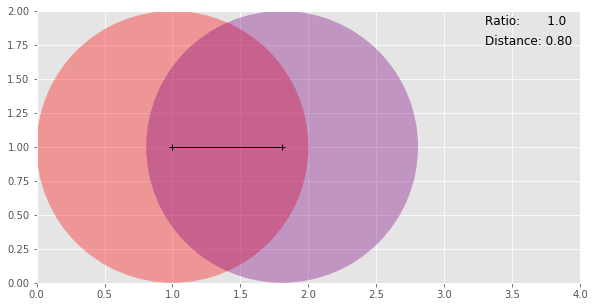

In [3]:
#Single plot for testing
patches =[]
fig, ax = plt.subplots(figsize = (10,5))

ax.set_xlim(0,4)
ax.set_ylim(0,2)
ax.set_aspect(1)

a = np.linspace(1,1.807,2)
ax.plot(a,[1,1],c='black', linewidth=1)
ax.text(3.3,1.90,'Ratio:       '+str(round(cos2area(.807/2)/(1-cos2area(.807/2)),2)), fontsize = 12)
ax.text(3.3, 1.75, 'Distance: 0.80', fontsize = 12)
patches.append(mpatches.Circle(xy=(1,1),radius = 1,color='#eeefff')) #Left Circle
patches.append(mpatches.Circle(xy=(1.807,1),radius = 1,color='C1')) #Right Circle

plt.plot(1,1,marker='+',c='black')
plt.plot(1.807,1,marker='+',c='black')

p=PatchCollection(patches, alpha=0.35,fc=['red','purple','yellow'])
ax.add_collection(p)

In [4]:
# JS/Html Animation
f=open('a.html','+w')
f.write(anim.to_jshtml())
f.close()